# A simulation of Buffon's needle experiment to calculate $\pi$

This Jupyter notebook uses [Matplotlib](https://matplotlib.org/) for visualization:

In [1]:
import math
import random
import matplotlib.pyplot as plt
import time

%load_ext watermark
%watermark -a "Author: gmalim" 
print("")
%watermark -u -n
print("")
%watermark -v -p matplotlib
print("")
%watermark -m

Author: gmalim

last updated: Fri Jul 06 2018

CPython 3.7.0
IPython 6.4.0

matplotlib 2.2.2

compiler   : Clang 8.0.0 (clang-800.0.42.1)
system     : Darwin
release    : 15.6.0
machine    : x86_64
processor  : i386
CPU cores  : 2
interpreter: 64bit


Enter number of simulated needles ($N_t$) and needle length over grid spacing ratio (*L/S*):

In [2]:
N_t = 1000    # between 0 and 1000000
LSratio = 0.8 # between 0 and 1

Create figure with gridlines, perform needle experiment simulation and plot results:

Total number of needles that crossed a grid line = 487 (out of 1000)

(total calculation time = 78.61 ms)


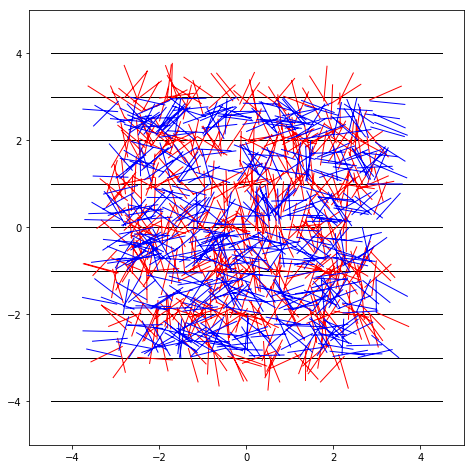

In [3]:
start = time.time()

# Create figure with gridlines:

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, aspect='equal')

for i in range(-4, 5):
    plt.plot([-4.5, 4.5], [i, i], color='black', linewidth=1)

plt.xlim(-5,5)
plt.ylim(-5,5)

# Loop over needles:

N_c = 0

xcoords_crossed    = [] # Needed for faster plotting
ycoords_crossed    = [] # Needed for faster plotting
xcoords_notcrossed = [] # Needed for faster plotting
ycoords_notcrossed = [] # Needed for faster plotting
    
for i in range(N_t):

    # Create random needle:
        
    x1    = 6*random.random()-3
    y1    = 6*random.random()-3
    angle = 2*math.pi*random.random()

    x2 = LSratio*math.cos(angle) + x1
    y2 = LSratio*math.sin(angle) + y1
        
    # Check if needle crossed a gridline:
        
    crossed = False
    for k in range(-3,4):
        if ((y2>k) and (y1<k)) or ((y2<k) and (y1>k)):
            crossed = True

    # Count & save needles:
               
    if crossed:
        N_c += 1    
        xcoords_crossed.append(x1)
        xcoords_crossed.append(x2)
        xcoords_crossed.append(None)
        ycoords_crossed.append(y1)
        ycoords_crossed.append(y2)
        ycoords_crossed.append(None)
        #plt.plot([x1, x2], [y1, y2], color='red', linewidth=1) # Slow
    else:
        xcoords_notcrossed.append(x1)
        xcoords_notcrossed.append(x2)
        xcoords_notcrossed.append(None)
        ycoords_notcrossed.append(y1)
        ycoords_notcrossed.append(y2)
        ycoords_notcrossed.append(None)
        #plt.plot([x1, x2], [y1, y2], color='blue', linewidth=1) # Slow

plt.plot(xcoords_crossed,    ycoords_crossed,    color='red',  linewidth=1) # Fast
plt.plot(xcoords_notcrossed, ycoords_notcrossed, color='blue', linewidth=1) # Fast

print('Total number of needles that crossed a grid line = {} (out of {})'.format(N_c, N_t))
print("")

end = time.time()
print('(total calculation time = {:.2f} ms)'.format((end - start)*1000))

Calculate $\pi_{\rm sim}$ from simulation result:

In [4]:
pi_approx = 2*LSratio*N_t/N_c

print('Needle length / Grid spacing (L/S)           = {}'.format(LSratio))
print('Total # of needles (N_t)                     = {}'.format(N_t)) 
print('Total # of needles that crossed a line (N_c) = {}'.format(N_c))
print('')
print('=> Pi_sim ~= 2*(L/S)*(N_t/N_c) = {}'.format(pi_approx))

Needle length / Grid spacing (L/S)           = 0.8
Total # of needles (N_t)                     = 1000
Total # of needles that crossed a line (N_c) = 487

=> Pi_sim ~= 2*(L/S)*(N_t/N_c) = 3.2854209445585214


Calculate the error between $\pi_{\rm sim}$ and the real $\pi$:

In [5]:
error = (pi_approx - math.pi)/math.pi

print('=> (Pi_sim - Pi) / Pi * 100 = {:.3%}'.format(error))

=> (Pi_sim - Pi) / Pi * 100 = 4.578%
